 ## Step 1: Installing Required Libraries

In [22]:
pip install pandas numpy matplotlib yfinance scikit-learn tensorflow keras seaborn

## Step 2: Importing Required Libraries

In [23]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from datetime import datetime, timedelta


## Step 3: Loading 1 Year of Data

In [24]:
# Set the date range for 1 year
end_date = datetime.now()
start_date = end_date - timedelta(days=365)

# Fetch stock data using yfinance
ticker = 'AAPL'  # You can change this to any stock symbol
df = yf.download(ticker, start=start_date.strftime('%Y-%m-%d'), end=end_date.strftime('%Y-%m-%d'))

# Display the first few rows of the data
df


[*********************100%***********************]  1 of 1 completed


## Step 4: Exploratory Data Analysis (EDA)

In [25]:
print(df.describe())

             Open        High         Low       Close   Adj Close  \
count  251.000000  251.000000  251.000000  251.000000  251.000000   
mean   190.818605  192.596853  189.199641  190.971235  190.461820   
std     18.786044   19.031072   18.373853   18.721909   18.894634   
min    165.350006  166.399994  164.080002  165.000000  164.585999   
25%    175.440002  177.395004  173.840004  175.615005  174.752983   
50%    187.039993  188.300003  185.830002  186.880005  186.663940   
75%    196.529999  197.839996  194.860001  197.255005  196.742744   
max    236.479996  237.229996  233.089996  234.820007  234.548523   

             Volume  
count  2.510000e+02  
mean   5.973695e+07  
std    2.511604e+07  
min    2.404830e+07  
25%    4.592600e+07  
50%    5.342310e+07  
75%    6.580375e+07  
max    2.464214e+08  


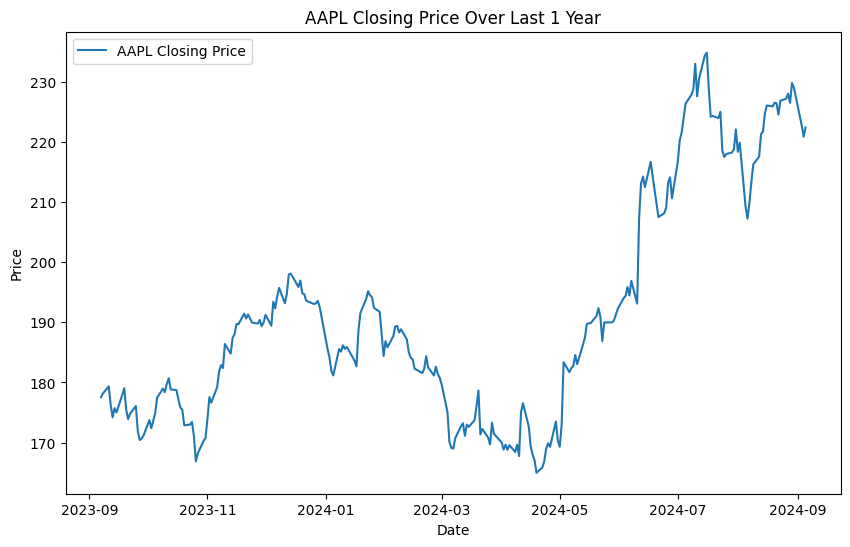

In [26]:
plt.figure(figsize=(10,6))
plt.plot(df['Close'], label=f'{ticker} Closing Price')
plt.title(f'{ticker} Closing Price Over Last 1 Year')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


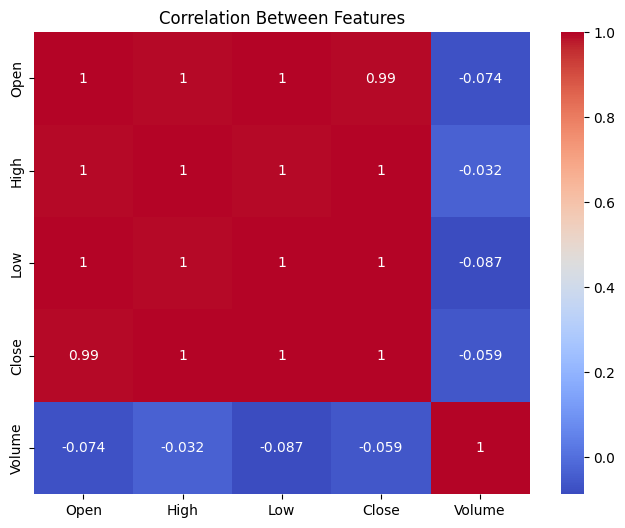

In [27]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['Open', 'High', 'Low', 'Close', 'Volume']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Features')
plt.show()


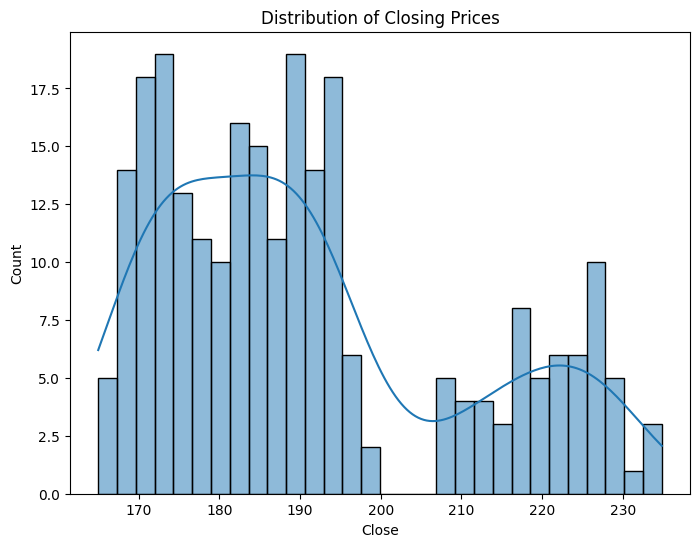

In [28]:
plt.figure(figsize=(8,6))
sns.histplot(df['Close'], kde=True, bins=30)
plt.title('Distribution of Closing Prices')
plt.show()


## Step 5: Data Preprocessing

In [29]:
data = df.filter(['Close'])
dataset = data.values


In [30]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)


In [31]:
training_data_len = int(np.ceil(len(scaled_data) * 0.8))

# Split into train and test datasets
train_data = scaled_data[0:training_data_len, :]
test_data = scaled_data[training_data_len - 60:, :]


In [32]:
x_train, y_train = [], []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))  # Reshaping for LSTM


In [33]:
x_test = []
y_test = dataset[training_data_len:, :]  # Actual closing prices

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))


## Step 6: Build the LSTM Model

In [34]:
# Initialize the LSTM model
model = Sequential()

# Add the first LSTM layer
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))

# Add a second LSTM layer
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))

# Add the output layer
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


## Step 7: Train the Model

In [35]:
# Train the model
history = model.fit(x_train, y_train, batch_size=32, epochs=20)


Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 120ms/step - loss: 0.1075
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 118ms/step - loss: 0.0210
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step - loss: 0.0158
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step - loss: 0.0132
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 112ms/step - loss: 0.0137
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 127ms/step - loss: 0.0089
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - loss: 0.0107
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 223ms/step - loss: 0.0098
Epoch 9/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 148ms/step - loss: 0.0095
Epoch 10/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 143ms/step - loss: 0.0082
Epoch 11/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step - loss: 0.0084
Epoch 12/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - loss: 0.0102
Epoch 13/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - loss: 0.0072
Epoch 14/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 133ms/step - loss: 0.0058
Epoch 15/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - loss: 0.0069
Epoch 16/20
5/5 ━━━━━

## Step 8: Making Predictions

In [36]:
# Get the model's predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)  # Unscale predictions back to original scale


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 358ms/step


## Step 9: Evaluate the Model

In [37]:
rmse = np.sqrt(np.mean(predictions - y_test) ** 2)
print(f'Root Mean Squared Error: {rmse}')


Root Mean Squared Error: 3.8494580078125


<ipython-input-38-ae0e8773f61a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


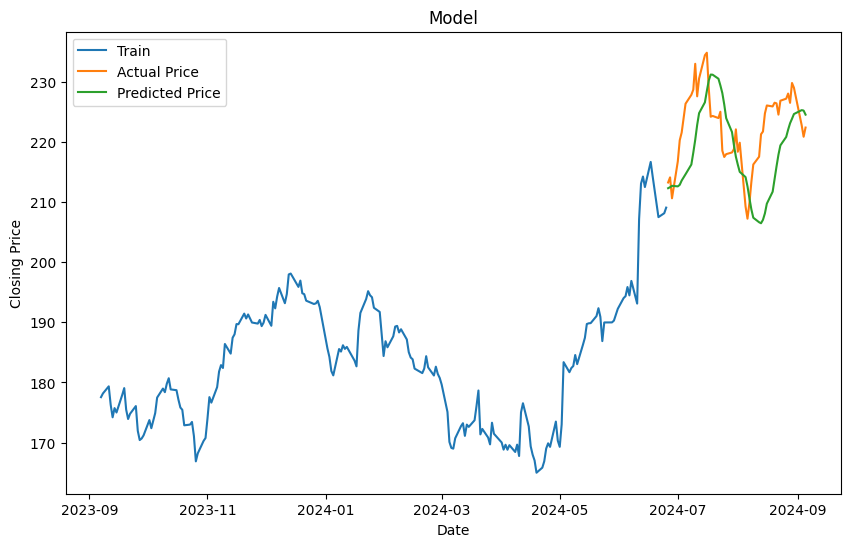

In [38]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(10,6))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.plot(train['Close'], label='Train')
plt.plot(valid['Close'], label='Actual Price')
plt.plot(valid['Predictions'], label='Predicted Price')
plt.legend()
plt.show()